# importing Library 

Python Libraries are a set of useful functions that eliminate the need for writing codes from scratch
Modules refer to a file containing Python statements and definitions.
A file containing Python code

In [1]:
import numpy as np
import pandas as pd
import os
print("Import library From Python Successfully")

Import library From Python Successfully


# Importing Dataset of Project

OS module in Python provides functions for interacting with the operating system.
This method returns a list containing the names of the entries in the directory given by path.


In [3]:
train_dir = 'D:/projects/Final Year Project/NEU Metal Surface Defects Data/train'
val_dir = 'D:/projects/Final Year Project/NEU Metal Surface Defects Data/valid'
test_dir='D:/projects/Final Year Project/NEU Metal Surface Defects Data/test'
print("Path Direcorty: ",os.listdir("D:/projects/Final Year Project/NEU Metal Surface Defects Data"))
print("Train Direcorty: ",os.listdir("D:/projects/Final Year Project/NEU Metal Surface Defects Data/train"))
print("Test Direcorty: ",os.listdir("D:/projects/Final Year Project/NEU Metal Surface Defects Data/test"))
print("Validation Direcorty: ",os.listdir("D:/projects/Final Year Project/NEU Metal Surface Defects Data/valid"))

Path Direcorty:  ['test', 'Thumbs.db', 'train', 'valid']
Train Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [5]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


# Importing Tensorflow & Keras Library

TensorFlow provides a collection of workflows to develop and train models using Python
Keras is the deep learning framework

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-

# Data-preprocessing

Machines don’t understand free text, image or video data as it is, they understand 1s and 0s. 
So it probably won’t be good enough if we put on a slideshow of all our images and expect our machine learning model to get
trained just by that!

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or Encoded, 
to bring it to such a state that now the machine can easily parse it.

In [7]:
#Data Transformation
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


# Keras Callback-to stop training a neural-network using callback

All callbacks subclass the keras.callbacks.Callback class, and override a set of methods called at various stages of training, testing, and predicting. Callbacks are useful to get a view on internal states and statistics of the model during training.

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

# The Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Tensors are multi-dimensional arrays with a uniform type

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [13]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 105s 636ms/step - loss: 2.0230 - acc: 0.3249 - val_loss: 1.2974 - val_acc: 0.6250
Epoch 2/20
166/166 [==============================] - 74s 446ms/step - loss: 1.2707 - acc: 0.5441 - val_loss: 0.9693 - val_acc: 0.6528
Epoch 3/20
166/166 [==============================] - 73s 438ms/step - loss: 0.9382 - acc: 0.6685 - val_loss: 0.4799 - val_acc: 0.8611
Epoch 4/20
166/166 [==============================] - 75s 455ms/step - loss: 0.7358 - acc: 0.7579 - val_loss: 0.3796 - val_acc: 0.9444
Epoch 5/20
166/166 [==============================] - 76s 459ms/step - loss: 0.6164 - acc: 0.8086 - val_loss: 0.2880 - val_acc: 0.9028
Epoch 6/20
166/166 [==============================] - 75s 450ms/step - loss: 0.5772 - acc: 0.8104 - val_loss: 3.2770 - val_acc: 0.6944
Epoch 7/20
166/166 [==============================] - 75s 451ms/step - loss: 0.4769 - acc: 0.8599 - val_loss: 0.6667 - val_acc: 0.8056
Epoch 8/20
166/166 [==============================] - 

# summarize history for accuracy  & loss

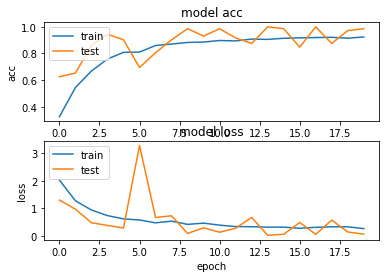

In [14]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model acc')  
plt.ylabel('acc')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Loading Testing Data

In [16]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir="D:/projects/Final Year Project/NEU Metal Surface Defects Data/test"

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [18]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [19]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

Using TensorFlow backend.


In [20]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [21]:
x_test = x_test.astype('float32')/255


# visualize test prediction

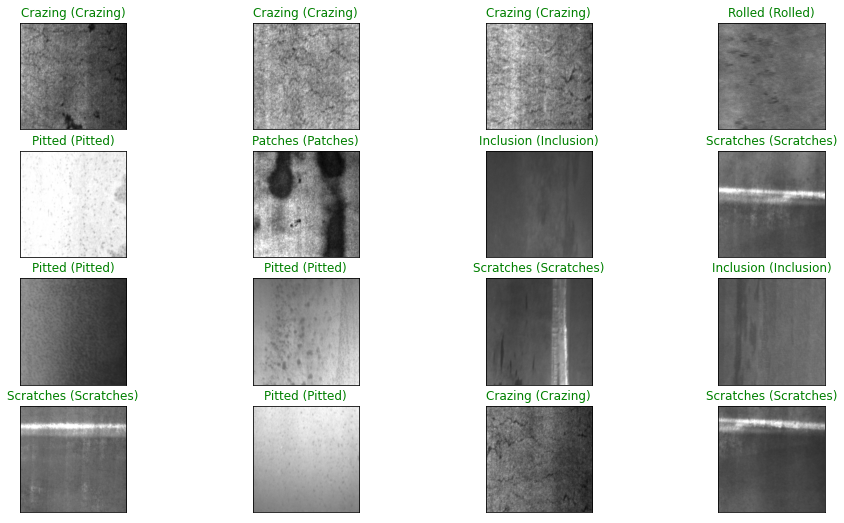

In [23]:
y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))